In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time
from scipy.special import expit

In [2]:
def function(x):
    nof=2
    nov=1
    sol=np.empty(nof)
    if x<=1:
        sol[0]=-x
    elif 1<x<=3:
        sol[0]=x-2
    elif 3<x<=4:
        sol[0]=4-x
    else:
        sol[0]=x-4
        
    sol[1]=(x-5)**2
    return sol

In [3]:
def res(x):
    status=True
    return status

xmax=np.array([10])
xmin=np.array([-5])

In [4]:
def isdomina(x_i, x_j):
    f_i=function(x_i)
    f_j=function(x_j)
    nof=f_j.size
    flagless=0
    flagequal=0
    aux=None
    for i in range(nof):
        if f_i[i]<f_j[i]:
            flagless=flagless+1
        elif f_j[i]==f_i[i]:
            flagequal=flagequal+1
    if flagless+flagequal ==nof and flagless>0: #se sim o domina o corrente
        aux=True
    else:
        aux=False
    return aux

In [5]:
def iarch(HL, SL, nov):
    x_j=np.empty([nov])
    archive=np.empty([0,nov])
    x_i=np.random.rand(nov)
    lines=0
    r=0
    while lines<(SL*2):
        for i in range(0,nov):
            x_j[i]=np.random.uniform(low=xmin[i], high=xmax[i], size=None)
        if (res(x_j)) and isdomina(x_i, x_j) or r>20:
            archive=np.vstack([archive, x_j])
            r=0
            lines=lines+1
        else:
            r= r+1
    return archive

In [6]:
def newsol(x_i, C):
    nov=1
    x_j=0
    es=0
    delr=10
    while es==0:
        rand=np.random.rand()
        u=0
        for i in range(C):
            u=u+np.random.uniform(high=0.5, low=-0.5, size=None)
        delta=u/C*delr*np.random.choice([-1,1])
        x_j=x_i+delta
        if x_j>xmax:
            x_j=xmax
        if x_j<xmin:
            x_j=xmin
        if res(x_j):
            es=1
        else:
            es=0
    return x_j

In [7]:
def maxmin(sol):
    nof=sol.shape[1]
    R=np.empty(nof)
    for i in range(0,nof):
        R[i]=max(sol[i])-min(sol[i])
    return R 

In [8]:
def delws(archive, sol, nof):
    nov=archive.shape[1]
    newarchive=np.empty([0,nov])
    size=archive.shape[0]
    lines=0
    flag=np.empty(archive.shape[0])
    #sol=np.empty([archive.shape[0], nof])
    #for i in range(archive.shape[0]):
        #sol[i]=function(archive[i])
    while lines<size:
        for i in range(0,size): 
            if lines != i:
                cont=0
                k=0
                for col in range(0,nof): #verifica se é dominado ou não
                    if sol[lines][col]<sol[i][col]:
                        cont=cont+1
                    else:
                        k=k+1
                if k==2:
                    flag[lines]=False
                    break
                else: 
                    flag[lines]=True
        lines=lines+1
    for l in range(archive.shape[0]):
        if flag[l]:
             newarchive=np.vstack([newarchive, archive[l]])
    return newarchive

In [9]:
def clust(size, archive):
    nof=archive.shape[1]
    while archive.shape[0]>size:
        linhas=archive.shape[0]
        mm=np.empty(linhas)
        deli=0
        for u in range(1,linhas):
            mm[u-1]=np.sqrt((archive[u-1]-archive[u])**2)
        diff=800
        ind=0
        for i in range(0, mm.size):
            if mm[i]<diff:
                diff=mm[i]
                ind=i
        #ind=np.argmin(mm)
        if ind!=0 and ind!=(mm.size-1):
            if mm[ind+1]<= mm[ind-1]:
                deli=ind+1
            elif mm[ind-1]<=mm[ind+1]:
                deli=ind
        elif ind==(mm.size-1):
            #lista=np.append(lista, ind-1)
            deli=ind-1
        else:
            #lista=np.append(lista, ind+1)
            deli=ind+1  
        archive=np.delete(archive, deli, axis=0)   
            
    return archive

In [10]:
def inc(x, archive):
    aux=None
    for i in range(archive.shape[0]):
        j=0
        for col in range(0,archive.shape[1]):
            if x[col] == archive[i][col]:
                j=j+1
        if j == archive.shape[1]:
            aux = True
            break
        else:
            aux=False
    return aux

##### problema resolver um 



In [11]:
def maxdom(sola, solarchive, nof, R):
    aux2=0
    aux=np.ones([solarchive.shape[0], nof])
    for i in range(solarchive.shape[0]):
        for col in range(nof):
            if sola[col]<=solarchive[i][col]:
                aux[i]=0
                break
            else:
                aux[i]=aux[i]*(sola[col]-solarchive[i][col])*R[col]
    aux2=np.amax(aux)
    
    return aux2        
            
# se sola dominar uma variaável já pode parar e definir que deltadom=0


In [12]:
def plotf(archive,nof,repeat):
    lines=archive.shape[0]
    nov=archive.shape[1]
    evalu=np.empty([lines, nof])
    for i in range(0,lines):
        evalu[i]=function(archive[i])
    ff1, ff2=evalu.T
    plt.scatter(ff1, ff2)
    plt.grid(b=None, color='grey', which='major', axis='both')
    plt.xlabel("f1(x)", fontsize=13, fontweight='bold')
    plt.ylabel("f2(x)", fontsize=13, fontweight='bold')
    #plt.title("Frente de pareto", fontsize=15, fontweight='bold')
    nome="Coannealing-"+str(repeat)+".pdf"
    np.savetxt("Coannealing-archive-"+str(repeat), archive, delimiter=" ")
    np.savetxt("Coannealing-sol-"+str(repeat), evalu, delimiter=" ")
    plt.savefig(nome, format='pdf', depi=600)
    plt.show()

In [13]:
def coannealing(Tmax, Tmin, N, alpha, SL, HL, nof, nov):
    archive=iarch(HL, SL, nov)
    #archive=reo(archive,nov)
    ale=np.random.choice(np.arange(archive.shape[0]))
    x_i=archive[ale]
    temp=Tmax
    r=0
    max_r=10
    C=1
    while temp>Tmin:
        for ciclo in range(N):
            x_j=newsol(x_i, C)
            solarchive=np.zeros([archive.shape[0], nof])
            soli=function(x_i)
            solj=function(x_j)
            #print(solj)
            for i in range(archive.shape[0]):
                solarchive[i]=function(archive[i])
            R=maxmin(solarchive)
            deltaE=maxdom(solj, solarchive, nof, R)-maxdom(soli, solarchive, nof, R)
            p=np.random.rand()
            prob=expit(-deltaE/temp)
            if deltaE<=0 or p<prob:
                x_i=x_j
                soli=solj
                aux=maxdom(solj,solarchive,nof,R)
                C=C+1
                if aux<=0:
                    archive=np.vstack([archive, x_j])
                    solarchive=np.vstack([solarchive, solj])
                    #print("Adicionado")
                    if archive.shape[0]>SL:
                        archive=delws(archive, solarchive, nof)
                        archive=clust(HL, archive)
                        #print("Adicionado")
                        if inc(x_i,archive):
                            if r<max_r:
                                archive=np.vstack([archive, x_i])
                            else:
                                ale=np.random.choice(np.arange(archive.shape[0]))
                                x_i=archive[ale]
                                r=r+1
                        else:
                            r=0
            else:
                C=C-1
                if C<=0:
                    C=1
        temp=temp*alpha
        #print(archive.shape)
        #plotf(archive, 2,1)
        #archive=delws(archive, solarchive, nof)
    return archive            

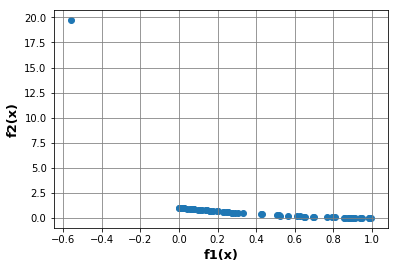

CPU times: user 44.4 s, sys: 21.7 ms, total: 44.4 s
Wall time: 45 s


In [14]:
%%time
repeat=1
cputime=np.zeros([repeat,2])
for i in range(repeat):
    Tmax=1000
    Tmin=0.1
    N=100
    alpha=0.85
    HL=50
    SL=100
    nof=2
    nov=1
    start=time.time()
    archive1=coannealing(Tmax,Tmin,N,alpha,SL,HL,nof,nov)
    end=time.time()
    plotf(archive1,nof, i)
    cputime[i][0]=end-start
    cputime[i][1]=cputime[i][0]/60
#np.savetxt("tempo.csv", cputime, delimiter=",")

In [15]:
print(archive1.shape)

(96, 1)
